In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [5]:
!ls

datalab  df_new.csv  test.csv


# **Importing Dataset**

In [0]:
df=pd.read_csv('df_new.csv')

In [9]:
df.head()

,id,user_id,campaign_id,send_date,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,Newsletter,88,79,13,4,0
1,52_134438,134438,52,02-11-2017 12:53,0,Newsletter,67,62,10,4,0
2,33_181789,181789,33,24-07-2017 15:15,0,Others,7,3,1,1,0
3,44_231448,231448,44,05-09-2017 11:36,0,Upcoming Events,60,56,19,6,0
4,29_185580,185580,29,01-07-2017 18:01,0,Newsletter,67,61,12,3,0


In [0]:
df_com=pd.read_csv('campaign.csv')

In [11]:
df_com.head()

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


In [0]:
subject=[]

In [0]:
for i in range(len(df)):
  for j in range(len(df_com)):
    if(df['campaign_id'][i]==df_com['campaign_id'][j]):
      subject.append(df_com['subject'][j])

In [15]:
len(subject)

1023191

In [16]:
len(df)

1023191

In [0]:
df['subject']=subject

In [0]:
df.to_csv('df_new1.csv',index=False)

In [0]:
files.download('df_new1.csv')

In [0]:
len(df_com)

52

In [0]:
len(df)

1023191

# **Trying to generate is_Open**

In [22]:
df.head()

,id,user_id,campaign_id,send_date,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click,subject
0,42_14051,14051,42,01-09-2017 19:55,0,Newsletter,88,79,13,4,0,[September] Exciting days ahead with DataHack ...
1,52_134438,134438,52,02-11-2017 12:53,0,Newsletter,67,62,10,4,0,[Newsletter] Stage for DataHack Summit 2017 is...
2,33_181789,181789,33,24-07-2017 15:15,0,Others,7,3,1,1,0,"[Delhi NCR] Fireside Chat with DJ Patil, Forme..."
3,44_231448,231448,44,05-09-2017 11:36,0,Upcoming Events,60,56,19,6,0,"[September] Data Science Hackathons, Meetups a..."
4,29_185580,185580,29,01-07-2017 18:01,0,Newsletter,67,61,12,3,0,Sneak Peek: A look at the emerging data scienc...


In [0]:
open_df=df[['subject','is_open']]

In [97]:
open_df.head()

,subject,is_open
0,[September] Exciting days ahead with DataHack ...,0
1,[Newsletter] Stage for DataHack Summit 2017 is...,0
2,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",0
3,"[September] Data Science Hackathons, Meetups a...",0
4,Sneak Peek: A look at the emerging data scienc...,0


In [98]:
open_df['is_open'].value_counts()

0    920401
1    102790
Name: is_open, dtype: int64

In [99]:
	from sklearn.utils import resample

# Separate majority and minority classes
df_majority = open_df[open_df.is_open==0]
df_minority = open_df[open_df.is_open==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=12782,     # 12782 to match minority class
                                 random_state=123) # reproducible results
# Downsample majority class
df_minority_downsampled = resample(df_minority, 
                                 replace=False,    # sample without replacement
                                 n_samples=12782,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
open_dfd = pd.concat([df_majority_downsampled, df_minority_downsampled])
 
# Display new class counts
open_dfd.is_open.value_counts()

1    12782
0    12782
Name: is_open, dtype: int64

In [0]:
open_dfd=open_dfd.reset_index(drop=True)

In [101]:
open_dfd.head()

,subject,is_open
0,"[November Updates] - Announcing DataFest 2018,...",0
1,A.I. & Machine Learning: 5 reasons why you sho...,0
2,[October 2017] - Just a month to go! DataHack ...,0
3,[Register Now] Just 2 days to go for India's b...,0
4,A.I. & Machine Learning: 5 reasons why you sho...,0


In [102]:
open_dfd['subject'][0]

'[November Updates] - Announcing DataFest 2018, Mumbai'

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [0]:
ps=PorterStemmer()

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
corpus=[]
for i in range(len(open_dfd)):
  osub=re.sub('[^a-zA-Z]',' ',open_dfd['subject'][i])
  osub=osub.lower()
  osub=osub.split()
  osub=[ps.stem(word) for word in osub if not word in set(stopwords.words('english'))]
  osub=' '.join(osub)
  corpus.append(osub)

In [106]:
len(corpus)

25564

*Creating Bags of words model*

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [0]:
X=cv.fit_transform(corpus).toarray()


In [109]:
X.shape

(25564, 112)

In [0]:
y=open_dfd['is_open']

In [0]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [112]:
X_test.shape

(6391, 112)

In [113]:
from sklearn.ensemble import RandomForestClassifier 
orf_classifier = RandomForestClassifier(n_estimators=100,random_state=12) 
orf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, orf_classifier.predict(X_test))
print(cm)

[[1961 1202]
 [ 930 2298]]


In [115]:
(1961+2298)/6391

0.6664058832733532

# **Trying to detect relation between IS_OPEN and IS_CLICK**

In [0]:
isOpen=df['is_open']

In [178]:
len(isOpen)

1023191

In [0]:
isClick=df['is_click']

In [177]:
t=0
for i in range(len(isClick)):
  if isOpen[i]!=isClick[i]:
    t=t+1
print(t)

90008


In [0]:
clicked=df[df['is_click']==1]
notclicked=df[df['is_click']==0]

In [199]:
clicked.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
109,1,Upcoming Events,18,14,7,1,1
213,1,Newsletter,203,191,12,4,1
269,1,Newsletter,88,79,13,4,1
410,1,Conference,24,19,7,1,1
418,1,Others,9,2,1,1,1


In [0]:
clicked_notopen=clicked[clicked['is_open']==0]
clicked_open=clicked[clicked['is_open']==1]

In [203]:
clicked_notopen.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click


In [204]:
clicked_open.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
109,1,Upcoming Events,18,14,7,1,1
213,1,Newsletter,203,191,12,4,1
269,1,Newsletter,88,79,13,4,1
410,1,Conference,24,19,7,1,1
418,1,Others,9,2,1,1,1


In [209]:
clicked_open['communication_type'].value_counts()

Newsletter         5658
Conference         3228
Upcoming Events    1916
Hackathon          1059
Others              717
Webinar             161
Corporate            43
Name: communication_type, dtype: int64

*The means if there is clicked then it must have been open. Logically matching !!*

In [200]:
notclicked.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
0,0,Newsletter,88,79,13,4,0
1,0,Newsletter,67,62,10,4,0
2,0,Others,7,3,1,1,0
3,0,Upcoming Events,60,56,19,6,0
4,0,Newsletter,67,61,12,3,0


In [0]:
notclicked_notopen=notclicked[notclicked['is_open']==0]
notclicked_open=notclicked[notclicked['is_open']==1]

In [205]:
notclicked_notopen.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
0,0,Newsletter,88,79,13,4,0
1,0,Newsletter,67,62,10,4,0
2,0,Others,7,3,1,1,0
3,0,Upcoming Events,60,56,19,6,0
4,0,Newsletter,67,61,12,3,0


In [207]:
notclicked_notopen['communication_type'].value_counts()

Newsletter         413247
Conference         302845
Upcoming Events    135254
Others              40688
Hackathon           23632
Corporate            2477
Webinar              2258
Name: communication_type, dtype: int64

In [206]:
notclicked_open.head()

,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
11,1,Others,7,3,1,1,0
19,1,Conference,24,19,7,1,0
36,1,Conference,24,19,7,1,0
50,1,Conference,13,11,2,1,0
76,1,Others,7,3,1,1,0


In [208]:
notclicked_open['communication_type'].value_counts()

Newsletter         32148
Conference         26560
Upcoming Events    11794
Others              9531
Hackathon           8574
Webinar             1068
Corporate            333
Name: communication_type, dtype: int64

# **Making And Merging Dataset**

In [0]:
clicked = df['is_click']
df.drop(labels=['is_click'], axis=1,inplace = True)

In [0]:
df_com['communication_type'][0]

'Newsletter'

In [0]:
com=[]
total_links=[]
no_of_internal_links=[]
no_of_images=[]
no_of_sections=[]

In [0]:
for i in range(len(df)):
  for j in range(len(df_com)):
    if(df['campaign_id'][i]==df_com['campaign_id'][j]):
      com.append(df_com['communication_type'][j])
      total_links.append(df_com['total_links'][j])
      no_of_internal_links.append(df_com['no_of_internal_links'][j])
      no_of_images.append(df_com['no_of_images'][j])
      no_of_sections.append(df_com['no_of_sections'][j])

In [0]:
df['communication_type']=com
df['total_links']=total_links
df['no_of_internal_links']=no_of_internal_links
df['no_of_images']=no_of_images
df['no_of_sections']=no_of_sections

In [0]:
df.insert(10,'is_click',clicked)

In [0]:
df.to_csv('df_new.csv',index=False)

files.download('df_new.csv')

In [127]:
df.head()

,id,user_id,campaign_id,send_date,is_open,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,Newsletter,88,79,13,4,0
1,52_134438,134438,52,02-11-2017 12:53,0,Newsletter,67,62,10,4,0
2,33_181789,181789,33,24-07-2017 15:15,0,Others,7,3,1,1,0
3,44_231448,231448,44,05-09-2017 11:36,0,Upcoming Events,60,56,19,6,0
4,29_185580,185580,29,01-07-2017 18:01,0,Newsletter,67,61,12,3,0


# **Dropping some columns**

In [0]:
df=df.drop(['id', 'user_id','campaign_id','send_date'], axis=1)

# **Visualization**

In [0]:
df.dtypes

is_open                  int64
communication_type      object
total_links              int64
no_of_internal_links     int64
no_of_images             int64
no_of_sections           int64
is_click                 int64
dtype: object

In [0]:
df.is_click.value_counts()


0    1010409
1      12782
Name: is_click, dtype: int64

In [0]:
# Overview of summary (isClicked V.S. Not Clicked)
Clicked_Summary = df.groupby('is_click')
Clicked_Summary.mean()

,is_open,total_links,no_of_internal_links,no_of_images,no_of_sections
is_click,,,,,
0,0.089081,67.779154,62.436593,9.950169,2.656175
1,1.000000,66.384290,60.988578,9.833203,2.652324


In [0]:
df.isnull().any()

is_open                 False
communication_type      False
total_links             False
no_of_internal_links    False
no_of_images            False
no_of_sections          False
is_click                False
dtype: bool

In [0]:
df.describe()

,is_open,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
count,1.023191e+06,1.023191e+06,1.023191e+06,1.023191e+06,1.023191e+06,1.023191e+06
mean,1.004602e-01,6.776173e+01,6.241850e+01,9.948708e+00,2.656127e+00,1.249229e-02
std,3.006128e-01,4.733816e+01,4.606372e+01,4.855467e+00,1.688341e+00,1.110687e-01
min,0.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.900000e+01,7.000000e+00,1.000000e+00,0.000000e+00
50%,0.000000e+00,6.700000e+01,6.100000e+01,1.200000e+01,3.000000e+00,0.000000e+00
75%,0.000000e+00,1.040000e+02,1.000000e+02,1.300000e+01,4.000000e+00,0.000000e+00
max,1.000000e+00,2.030000e+02,1.910000e+02,1.900000e+01,6.000000e+00,1.000000e+00


,is_open,total_links,no_of_internal_links,no_of_images,no_of_sections,is_click
is_open,1.000000,-0.146731,-0.146681,-0.179535,-0.080381,0.336561
total_links,-0.146731,1.000000,0.998505,0.713043,0.389381,-0.003273
no_of_internal_links,-0.146681,0.998505,1.000000,0.718521,0.368877,-0.003491
no_of_images,-0.179535,0.713043,0.718521,1.000000,0.533472,-0.002676
no_of_sections,-0.080381,0.389381,0.368877,0.533472,1.000000,-0.000253
is_click,0.336561,-0.003273,-0.003491,-0.002676,-0.000253,1.000000


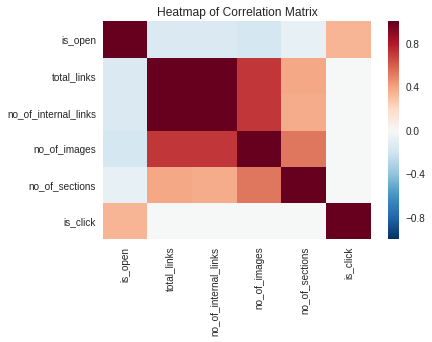

In [0]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


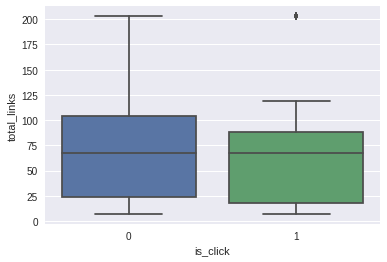

In [0]:
sns.boxplot(x="is_click", y="total_links", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


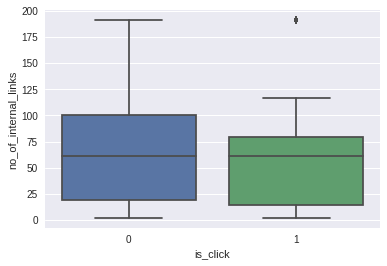

In [0]:
sns.boxplot(x="is_click", y="no_of_internal_links", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


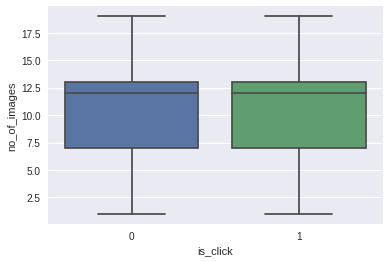

In [0]:
sns.boxplot(x="is_click", y="no_of_images", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


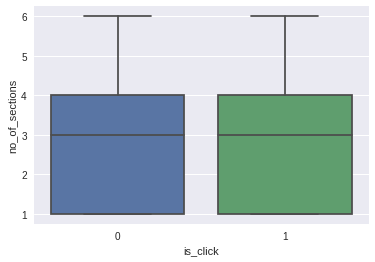

In [0]:
sns.boxplot(x="is_click", y="no_of_sections", data=df)

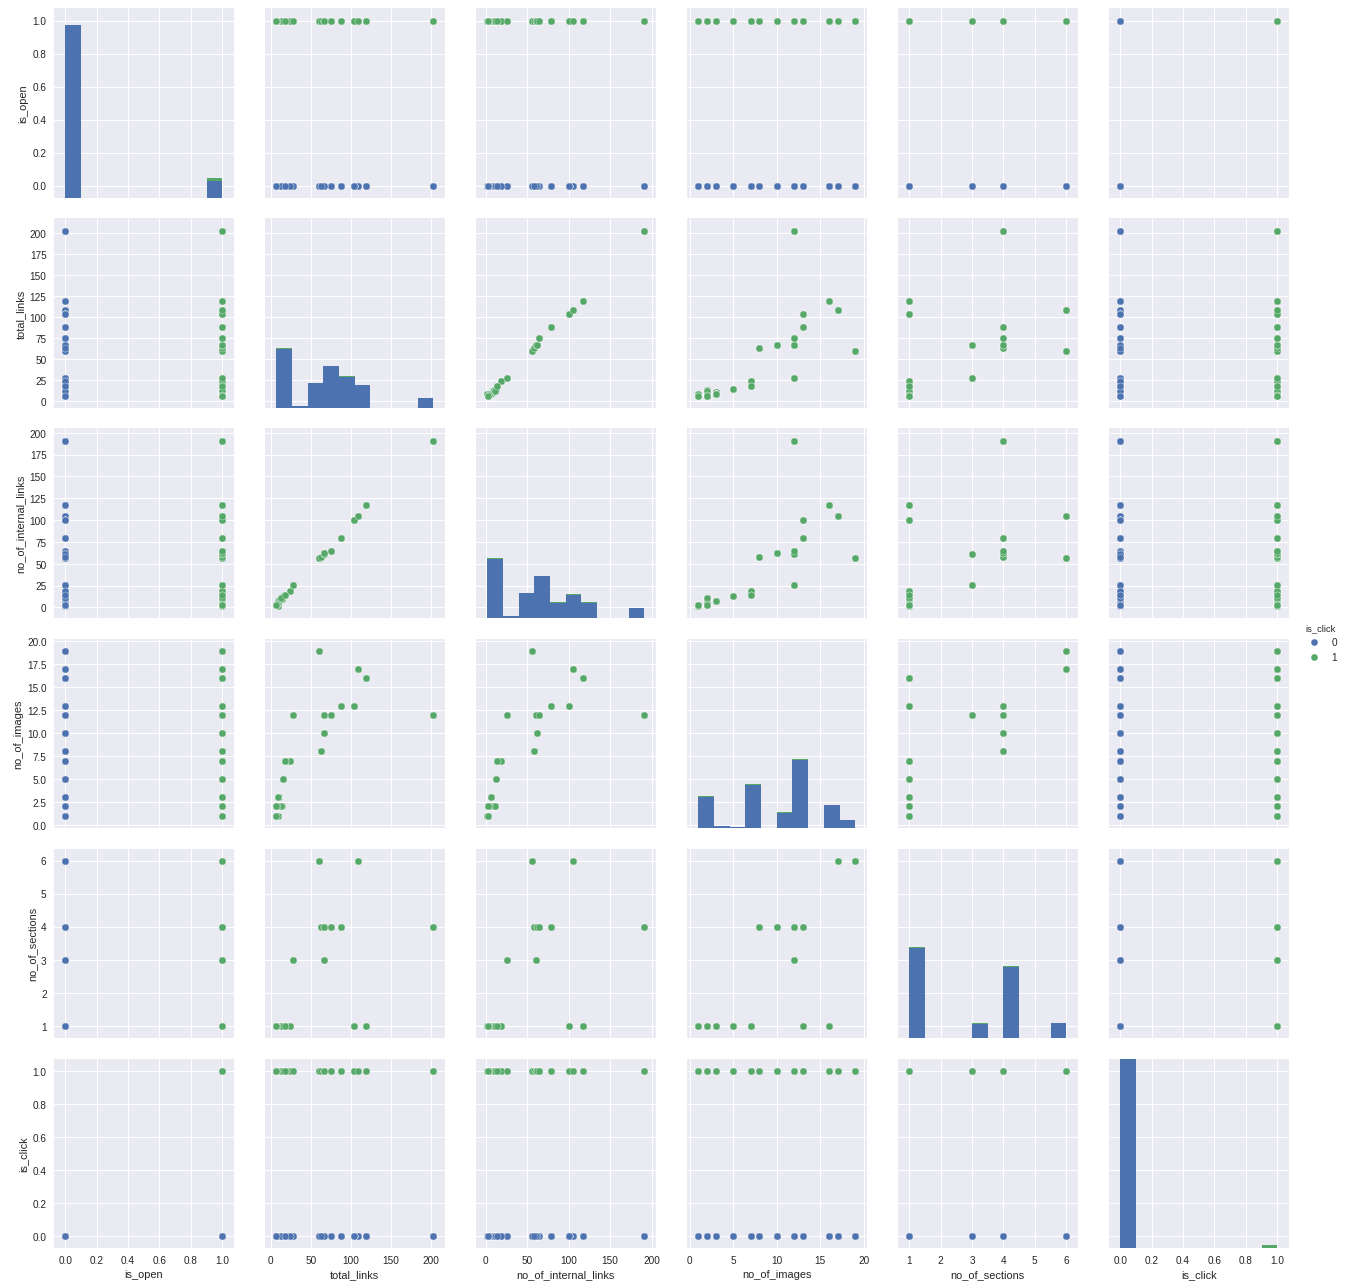

In [0]:
#sns.pairplot(df, hue="is_click", size=3)

# **Down-sampling**

In [117]:
len(df[df.is_click==0])

1010409

In [118]:
len(df[df.is_click==1])

12782

In [0]:
	from sklearn.utils import resample

In [123]:
# Separate majority and minority classes
df_majority = df[df.is_click==0]
df_minority = df[df.is_click==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=12782,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
dfd = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
dfd.is_click.value_counts()

1    12782
0    12782
Name: is_click, dtype: int64

# **MODELING**

In [209]:
dfd.head()

,is_open,communication_type,total_links,no_of_images,is_click
23089,0,Newsletter,0.413265,0.666667,0
777530,0,Conference,0.030612,0.055556,0
649845,0,Conference,0.571429,0.833333,0
165758,0,Others,0.000000,0.000000,0
415620,0,Conference,0.494898,0.666667,0


In [0]:
dfd=dfd.drop(['no_of_internal_links','no_of_sections','subject'], axis=1)

In [0]:
dfd['is_open']=dfd['is_open'].astype('object')

In [0]:
#dfd['is_click']=df['is_click'].astype('object')

In [211]:
dfd.dtypes

is_open                object
communication_type     object
total_links           float64
no_of_images          float64
is_click                int64
dtype: object

In [0]:
df_old=dfd

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfd[['total_links','no_of_images']] = scaler.fit_transform(dfd[['total_links','no_of_images']])

In [0]:
df['is_open']=df['is_open'].astype('object')

In [215]:
df.dtypes

is_open                 object
communication_type      object
total_links              int64
no_of_internal_links     int64
no_of_images             int64
no_of_sections           int64
is_click                 int64
subject                 object
dtype: object

In [0]:
y = dfd.is_click
X = dfd.drop('is_click', axis=1)

In [131]:
X.head()

,is_open,communication_type,total_links,no_of_images
23089,0,Newsletter,0.413265,0.666667
777530,0,Conference,0.030612,0.055556
649845,0,Conference,0.571429,0.833333
165758,0,Others,0.000000,0.000000
415620,0,Conference,0.494898,0.666667


In [0]:
X=pd.get_dummies(X)

In [218]:
X.head()

,total_links,no_of_images,is_open_0,is_open_1,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar
23089,0.413265,0.666667,1,0,0,0,0,1,0,0,0
777530,0.030612,0.055556,1,0,1,0,0,0,0,0,0
649845,0.571429,0.833333,1,0,1,0,0,0,0,0,0
165758,0.000000,0.000000,1,0,0,0,0,0,1,0,0
415620,0.494898,0.666667,1,0,1,0,0,0,0,0,0


In [0]:
TrainXcol=X.columns

In [0]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Trying Various Models**

## **1.SVM**

In [0]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', 
                #class_weight='balanced', # penalize
                probability=True)

In [137]:
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, svm_classifier.predict(X_test)))

0.9528928232690485


## 2.XGBoost

In [139]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, xgb_classifier.predict(X_test)))

0.9528928232690485


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 3.KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [142]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, knn_classifier.predict(X_test)))

0.9429010640769335


## 4. Random forest

In [221]:

from sklearn.ensemble import RandomForestClassifier 
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=12) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [222]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, rf_classifier.predict(X_test)))

0.9528928232690485


## 5.Naive-Bayes

In [170]:
from sklearn.naive_bayes import GaussianNB 
nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [171]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, nb_classifier.predict(X_test)))

0.5332282350809305


## 6. Decision Trees

In [145]:
from sklearn.tree import DecisionTreeClassifier 
dt_classifier = DecisionTreeClassifier(random_state=0) 
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [146]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, dt_classifier.predict(X_test)))

0.9528928232690485


# Predicting

In [0]:
df_test=pd.read_csv('test.csv')

In [148]:
len(df_test)

773858

In [149]:
df_test.head()

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12


In [0]:
sample=pd.read_csv('sample.csv')

In [151]:
sample.head()

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0


In [0]:
com=[]
total_links=[]
no_of_internal_links=[]
no_of_images=[]
no_of_sections=[]
subject=[]

In [0]:
for i in range(len(df_test)):
  for j in range(len(df_com)):
    if(df_test['campaign_id'][i]==df_com['campaign_id'][j]):
      com.append(df_com['communication_type'][j])
      total_links.append(df_com['total_links'][j])
      no_of_internal_links.append(df_com['no_of_internal_links'][j])
      no_of_images.append(df_com['no_of_images'][j])
      no_of_sections.append(df_com['no_of_sections'][j])
      subject.append(df_com['subject'][j])

In [155]:
len(com)

773858

In [0]:
df_test['communication_type']=com
df_test['total_links']=total_links
df_test['no_of_internal_links']=no_of_internal_links
df_test['no_of_images']=no_of_images
df_test['no_of_sections']=no_of_sections
df_test['subject']=subject

In [171]:
df_test['subject'][0]

5

# **Making Is_open**

In [0]:
sub=df_test['subject']

In [0]:
corpus=[]
for i in range(len(df_test)):
  osub=re.sub('[^a-zA-Z]',' ',df_test['subject'][i])
  osub=osub.lower()
  osub=osub.split()
  osub=[ps.stem(word) for word in osub if not word in set(stopwords.words('english'))]
  osub=' '.join(osub)
  corpus.append(osub)

In [0]:
X=cv.transform(corpus).toarray()

In [178]:
X.shape

(25564, 112)

In [0]:
is_open=orf_classifier.predict(X)

In [182]:
is_open

array([1, 1, 1, ..., 1, 1, 1])

In [183]:
len(is_open)

773858

In [184]:
len(df_test)

773858

In [0]:
df_test['is_open']=is_open

# **Usual modelling**

In [186]:
df_test.head()

,id,campaign_id,user_id,send_date,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,subject,is_open
0,63_122715,63,122715,01-02-2018 22:35,Newsletter,68,64,15,5,"AVbytes, Ultimate 2018 learning path and aweso...",1
1,56_76206,56,76206,02-01-2018 08:15,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,1
2,57_96189,57,96189,05-01-2018 18:25,Upcoming Events,40,36,15,4,"[January 2018] Upcoming Hiring Hackathons, Lea...",1
3,56_166917,56,166917,02-01-2018 08:15,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,1
4,56_172838,56,172838,02-01-2018 08:12,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,1


In [0]:
df_test=df_test.drop(['id', 'user_id','campaign_id','send_date','no_of_internal_links','no_of_sections'], axis=1)

In [0]:
df_test[['total_links','no_of_images']] = scaler.transform(df_test[['total_links','no_of_images']])


In [0]:
df_test=df_test.drop(['subject'], axis=1)

In [223]:
df_test.head()

,is_open,communication_type,total_links,no_of_images
0,1,Newsletter,0.311224,0.777778
1,1,Newsletter,0.178571,0.500000
2,1,Upcoming Events,0.168367,0.777778
3,1,Newsletter,0.178571,0.500000
4,1,Newsletter,0.178571,0.500000


In [0]:
df_test['is_open']=df_test['is_open'].astype('object')

In [0]:
df_test = df_test[['is_open','communication_type','total_links','no_of_images']]

In [0]:
X_test=df_test

In [0]:
X_test=pd.get_dummies(X_test)

In [0]:
TestXcol=X_test.columns

In [224]:
TrainXcol

Index(['total_links', 'no_of_images', 'is_open_0', 'is_open_1',
       'communication_type_Conference', 'communication_type_Corporate',
       'communication_type_Hackathon', 'communication_type_Newsletter',
       'communication_type_Others', 'communication_type_Upcoming Events',
       'communication_type_Webinar'],
      dtype='object')

In [231]:
TestXcol

Index(['total_links', 'no_of_images', 'is_open_0', 'is_open_1',
       'communication_type_Corporate', 'communication_type_Hackathon',
       'communication_type_Newsletter', 'communication_type_Upcoming Events'],
      dtype='object')

In [225]:
for i in range(len(TrainXcol)):
  f=0
  for j in range(len(TestXcol)):
    if TrainXcol[i]==TestXcol[j]:
      f=1
  if f==0:
    print(TrainXcol[i])

communication_type_Conference
communication_type_Others
communication_type_Webinar


In [0]:
Conference= np.zeros((773858,1))
Others= np.zeros((773858,1))
Webinar= np.zeros((773858,1))

In [0]:
X_test['communication_type_Conference']=Conference
X_test['communication_type_Others']=Others
X_test['communication_type_Webinar']=Webinar

In [233]:
X.head()

,total_links,no_of_images,is_open_0,is_open_1,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar
23089,0.413265,0.666667,1,0,0,0,0,1,0,0,0
777530,0.030612,0.055556,1,0,1,0,0,0,0,0,0
649845,0.571429,0.833333,1,0,1,0,0,0,0,0,0
165758,0.000000,0.000000,1,0,0,0,0,0,1,0,0
415620,0.494898,0.666667,1,0,1,0,0,0,0,0,0


In [0]:
X_test = X_test[['total_links', 'no_of_images', 'is_open_0', 'is_open_1',
       'communication_type_Conference', 'communication_type_Corporate',
       'communication_type_Hackathon', 'communication_type_Newsletter',
       'communication_type_Others', 'communication_type_Upcoming Events',
       'communication_type_Webinar']]

In [235]:
X_test.head()

,total_links,no_of_images,is_open_0,is_open_1,communication_type_Conference,communication_type_Corporate,communication_type_Hackathon,communication_type_Newsletter,communication_type_Others,communication_type_Upcoming Events,communication_type_Webinar
0,0.311224,0.777778,0,1,0.0,0,0,1,0.0,0,0.0
1,0.178571,0.500000,0,1,0.0,0,0,1,0.0,0,0.0
2,0.168367,0.777778,0,1,0.0,0,0,0,0.0,1,0.0
3,0.178571,0.500000,0,1,0.0,0,0,1,0.0,0,0.0
4,0.178571,0.500000,0,1,0.0,0,0,1,0.0,0,0.0


In [0]:
y_pred=rf_classifier.predict(X_test)

In [237]:
np.count_nonzero(y_pred)

664996

# Saving file

In [0]:
#Saving the file
result=pd.read_csv('sample.csv')
result['is_click']=y_pred

In [0]:
result.to_csv('rf_withOpen.csv',index=False)

In [0]:
files.download('rf_withOpen.csv')